In [13]:
import pandas as pd 

In [14]:
df = pd.read_csv(r'C:\Users\maype\OneDrive - sga.pucminas.br\Área de Trabalho\Faculdade\projects\A Machine Learning Approach to Characterizing Depression in Brazilian Adult\Data\Bases Modificadas\base_final.csv', index_col = 0)

In [15]:
df['Diagnostico_Depressao'].value_counts()

Diagnostico_Depressao
2.0    44040
1.0     4269
Name: count, dtype: int64

In [16]:
df.dtypes

Apoio_Familiar                                    float64
Apoio_de_Amigos                                   float64
Tipo_de_Trabalho                                  float64
Curso_Mais_Elevado                                float64
Diagnostico_Depressao                             float64
Estado_de_Saude                                   float64
Pratica_Exercicio                                 float64
Exercicio_Mais_Frequente                          float64
Procura_Atendimento_Saude                         float64
Problemas_Sono                                    float64
idade                                             float64
trabalhou                                         float64
doencas_cronicas                                    int64
moradia_vulneravel                                  int64
tempo_total_exercicio                             float64
frequencia_exercicio                              float64
freq_bebida_alcoolica                             float64
Consumo de Gra

In [17]:
df =df.astype('category')
df.dtypes

Apoio_Familiar                                    category
Apoio_de_Amigos                                   category
Tipo_de_Trabalho                                  category
Curso_Mais_Elevado                                category
Diagnostico_Depressao                             category
Estado_de_Saude                                   category
Pratica_Exercicio                                 category
Exercicio_Mais_Frequente                          category
Procura_Atendimento_Saude                         category
Problemas_Sono                                    category
idade                                             category
trabalhou                                         category
doencas_cronicas                                  category
moradia_vulneravel                                category
tempo_total_exercicio                             category
frequencia_exercicio                              category
freq_bebida_alcoolica                             catego

In [18]:
df = df.drop('idade', axis= 1)

In [19]:
df.columns

Index(['Apoio_Familiar', 'Apoio_de_Amigos', 'Tipo_de_Trabalho',
       'Curso_Mais_Elevado', 'Diagnostico_Depressao', 'Estado_de_Saude',
       'Pratica_Exercicio', 'Exercicio_Mais_Frequente',
       'Procura_Atendimento_Saude', 'Problemas_Sono', 'trabalhou',
       'doencas_cronicas', 'moradia_vulneravel', 'tempo_total_exercicio',
       'frequencia_exercicio', 'freq_bebida_alcoolica',
       'Consumo de Graos e Tuberculos', 'Consumo de Leguminosas',
       'Consumo de Carnes', 'Consumo de Ovos', 'Consumo de Verduras e Legumes',
       'Consumo de Frutas', 'Consumo de Laticinios', 'Consumo de Oleaginosas',
       'Consumo de Refrigerantes', 'Consumo de Sucos Industrializados',
       'Consumo de Sucos Naturais', 'Consumo de Bebidas Lacteas',
       'Consumo de Salgadinhos e Biscoitos Salgados',
       'Consumo de Doces e Sobremesas Industrializadas',
       'Consumo de Embutidos e Alimentos Processados',
       'Consumo de Paes Industrializados',
       'Consumo de Molhos Industrializ

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48309 entries, 0 to 48308
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Apoio_Familiar                                  48309 non-null  category
 1   Apoio_de_Amigos                                 48309 non-null  category
 2   Tipo_de_Trabalho                                48309 non-null  category
 3   Curso_Mais_Elevado                              48309 non-null  category
 4   Diagnostico_Depressao                           48309 non-null  category
 5   Estado_de_Saude                                 48309 non-null  category
 6   Pratica_Exercicio                               48309 non-null  category
 7   Exercicio_Mais_Frequente                        48309 non-null  category
 8   Procura_Atendimento_Saude                       48309 non-null  category
 9   Problemas_Sono                   

In [21]:
df['Diagnostico_Depressao'].value_counts()

Diagnostico_Depressao
2.0    44040
1.0     4269
Name: count, dtype: int64

In [22]:
df['Diagnostico_Depressao'] = df['Diagnostico_Depressao'].replace(2, 0)

C:\Users\maype\AppData\Local\Temp\ipykernel_3720\4293311392.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Diagnostico_Depressao'] = df['Diagnostico_Depressao'].replace(2, 0)


In [23]:
df.isna().sum()

Apoio_Familiar                                    0
Apoio_de_Amigos                                   0
Tipo_de_Trabalho                                  0
Curso_Mais_Elevado                                0
Diagnostico_Depressao                             0
Estado_de_Saude                                   0
Pratica_Exercicio                                 0
Exercicio_Mais_Frequente                          0
Procura_Atendimento_Saude                         0
Problemas_Sono                                    0
trabalhou                                         0
doencas_cronicas                                  0
moradia_vulneravel                                0
tempo_total_exercicio                             0
frequencia_exercicio                              0
freq_bebida_alcoolica                             0
Consumo de Graos e Tuberculos                     0
Consumo de Leguminosas                            0
Consumo de Carnes                                 0
Consumo de O

### Balanceado os dados

In [24]:
# 1. Importar as bibliotecas necessárias
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

# 2. Separar as features (X) e o target (y)
X = df.drop('Diagnostico_Depressao', axis=1)
y = df['Diagnostico_Depressao']

# 3. Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Criar um objeto RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# 5. Aplicar o undersampling ao conjunto de treino
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)


In [26]:
# Recuperar os índices dos dados removidos
removed_indices = rus.sample_indices_
removed_X = X.iloc[removed_indices]
removed_y = y.iloc[removed_indices]

# Adicionar os dados removidos ao X_test e y_test
X_test = pd.concat([X_test, removed_X])
y_test = pd.concat([y_test, removed_y])


# 5. Aplicar o undersampling ao conjunto de teste
X_test_resampled, y_test_resampled = rus.fit_resample(X_test, y_test)

In [27]:
# Verificar tamanhos
print(f"Tamanho de y_test: {len(y_test)}, Tamanho de y_pred_dtc: {len(X_test)}")

Tamanho de y_test: 23194, Tamanho de y_pred_dtc: 23194


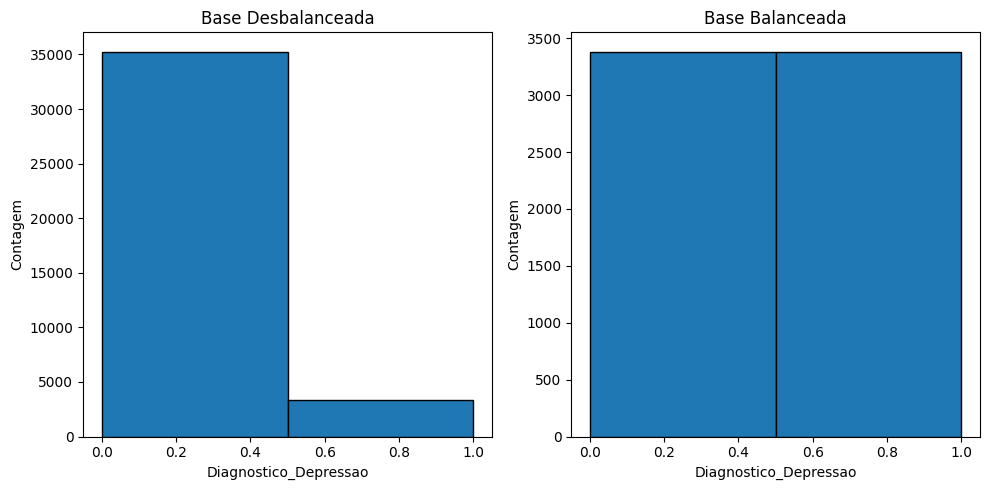

In [28]:
# Visualizar a distribuição das classes
plt.figure(figsize=(10, 5))

# Histograma da base desbalanceada
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=2, edgecolor='black')
plt.title('Base Desbalanceada')
plt.xlabel('Diagnostico_Depressao')
plt.ylabel('Contagem')

# Histograma da base balanceada
plt.subplot(1, 2, 2)
plt.hist(y_train_resampled, bins=2, edgecolor='black')
plt.title('Base Balanceada')
plt.xlabel('Diagnostico_Depressao')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()


In [30]:
# Salvar os dados de treino
X_train_resampled.to_csv(r'C:\Users\maype\OneDrive - sga.pucminas.br\Área de Trabalho\Faculdade\projects\A Machine Learning Approach to Characterizing Depression in Brazilian Adult\Python\Notebooks\Modelling\X_train.csv', index=False)
y_train_resampled.to_csv(r'C:\Users\maype\OneDrive - sga.pucminas.br\Área de Trabalho\Faculdade\projects\A Machine Learning Approach to Characterizing Depression in Brazilian Adult\Python\Notebooks\Modelling\y_train.csv', index=False)

# Salvar os dados de teste
X_test_resampled.to_csv(r'C:\Users\maype\OneDrive - sga.pucminas.br\Área de Trabalho\Faculdade\projects\A Machine Learning Approach to Characterizing Depression in Brazilian Adult\Python\Notebooks\Modelling\X_test.csv', index=False)
y_test_resampled.to_csv(r'C:\Users\maype\OneDrive - sga.pucminas.br\Área de Trabalho\Faculdade\projects\A Machine Learning Approach to Characterizing Depression in Brazilian Adult\Python\Notebooks\Modelling\y_test.csv', index=False)